**Importing liberaries**

In [31]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt 
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as mtp  
import warnings
warnings.filterwarnings("ignore")

**Reading data file**

In [32]:
df = pd.read_csv('diabetes.csv')

In [33]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [34]:
#Show all the information about columns in data fram  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [35]:
df.drop_duplicates()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [36]:
(df == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [37]:
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].mean())
df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].mean())
df['BMI'] = df['BMI'].replace(0, df['BMI'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].mean())


In [38]:
(df == 0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

**Spliting data into features and target data**

In [39]:
feature = df.drop('Outcome',axis = 1)
target = df['Outcome']

In [40]:
#Determine the size of graphs 
from matplotlib import rcParams
rcParams['figure.figsize'] = 12,7

**Data visualization**

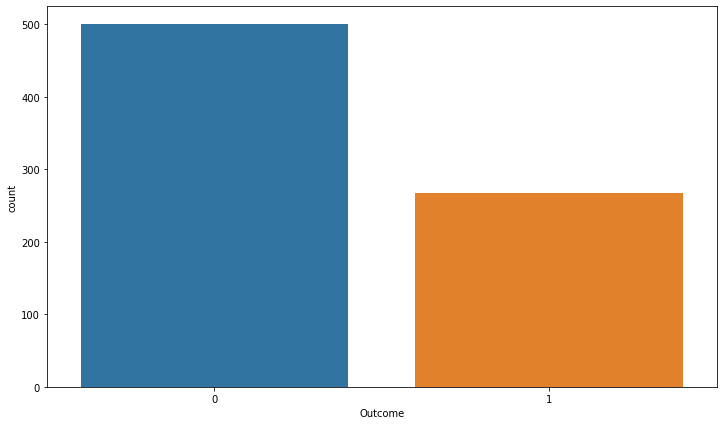

In [41]:
sns.countplot('Outcome',data=df)

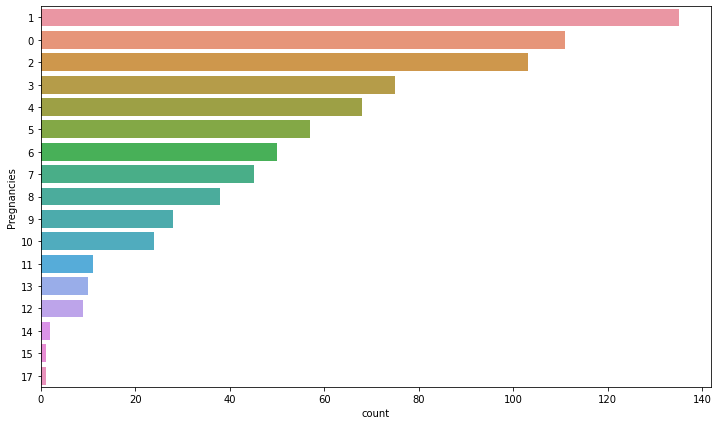

In [42]:
type_order = df['Pregnancies'].value_counts().index
sns.countplot(data=df, y='Pregnancies', order=type_order);

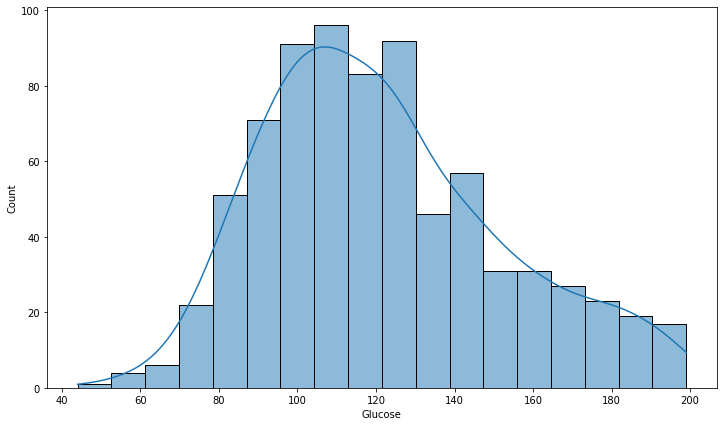

In [43]:
sns.histplot(df['Glucose'], kde=True);

Text(0.5, 1.0, 'Blood Pressure')

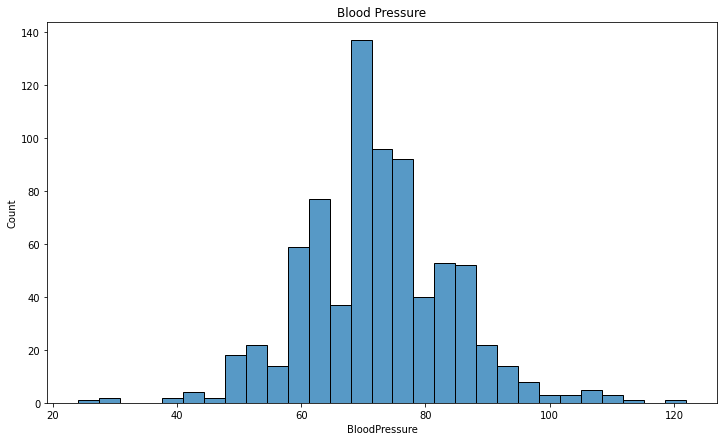

In [44]:
#blood pressure 
sns.histplot(df['BloodPressure'])
plt.title("Blood Pressure")


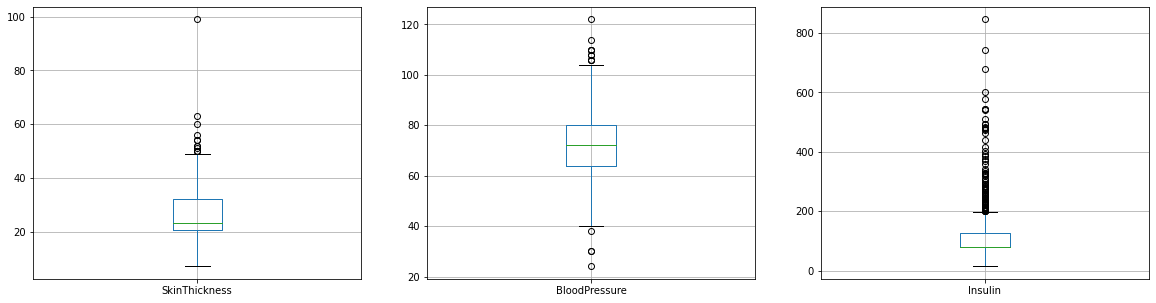

In [45]:
#Outliers
plt.figure(figsize = [20,5])
plt.subplot(1,3,1)
df.boxplot(column = "SkinThickness")
plt.subplot(1,3,2)
df.boxplot(column = "BloodPressure")
plt.subplot(1,3,3)
df.boxplot(column = "Insulin")

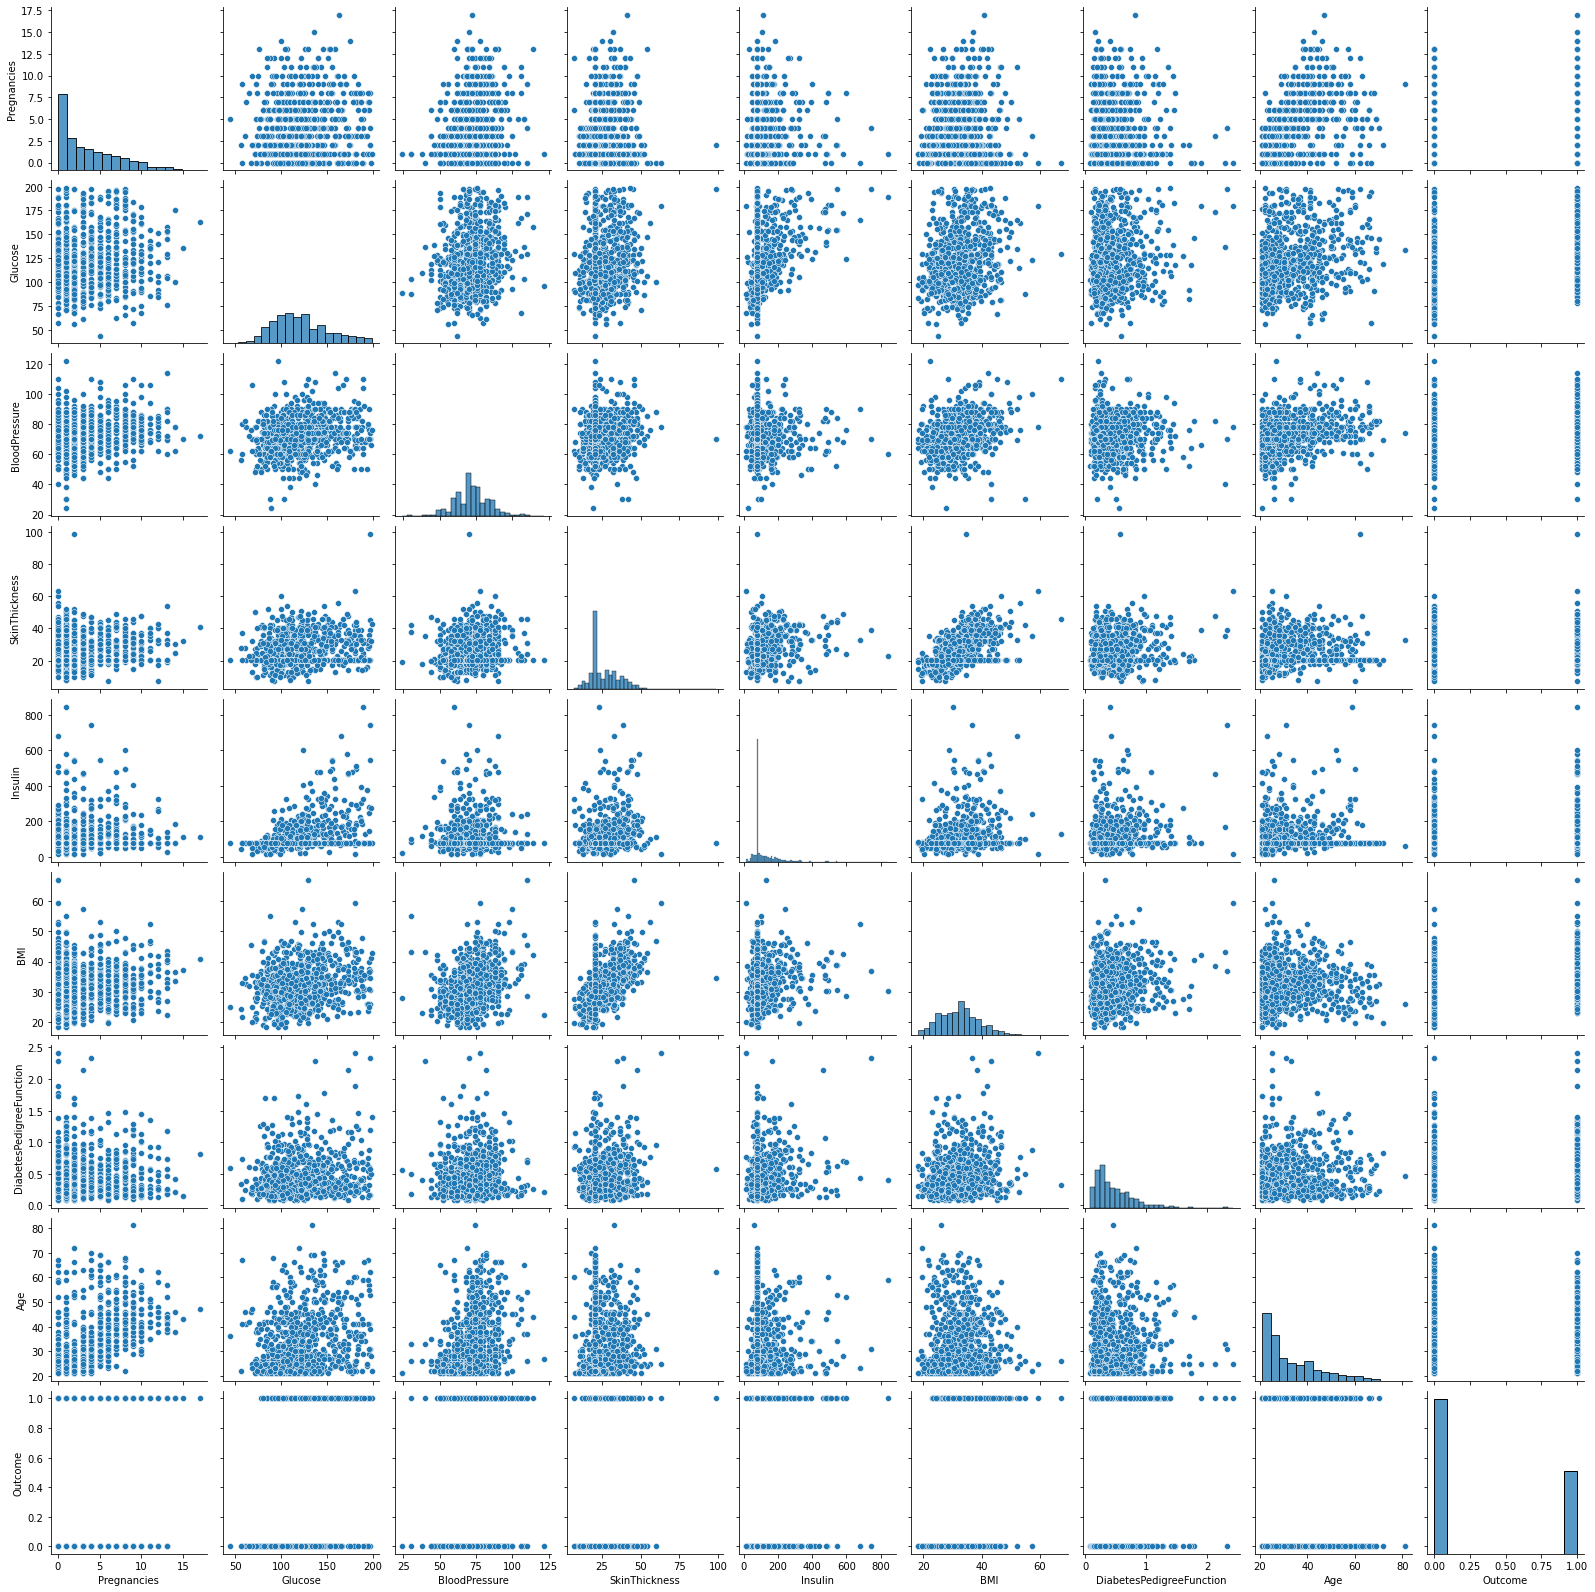

In [46]:
#correlation analysis
sns.pairplot(df)

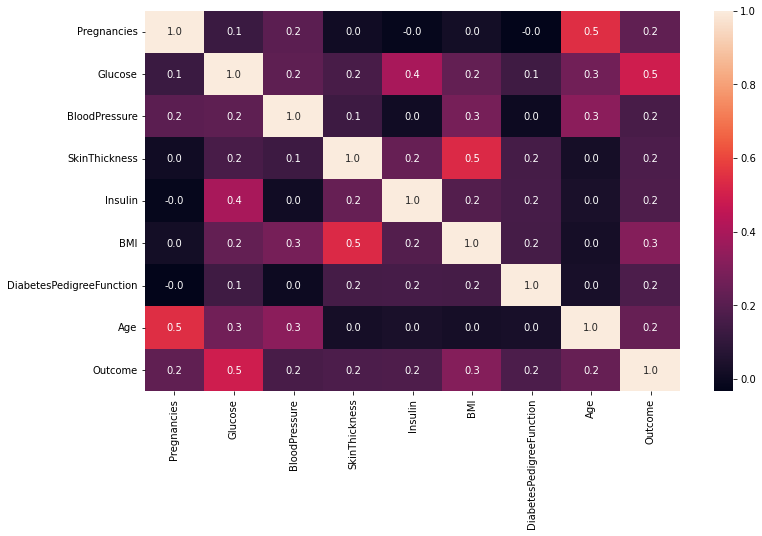

In [63]:
#heatmap
sns.heatmap(df.corr(), annot = True, fmt = ".1f")

**Machine learning model** 

In [48]:
# Shuffle and split the data into training and testing subsets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.20, random_state=0)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


In [49]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [50]:
y_pred = classifier.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.8311688311688312


In [52]:
diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
diff

,Actual value,Predicted value
661,1,1
122,0,0
113,0,0
14,1,1
529,0,0
...,...,...
476,1,0
482,0,0
230,1,1
527,0,0


In [53]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
  
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[98  9]
 [17 30]]


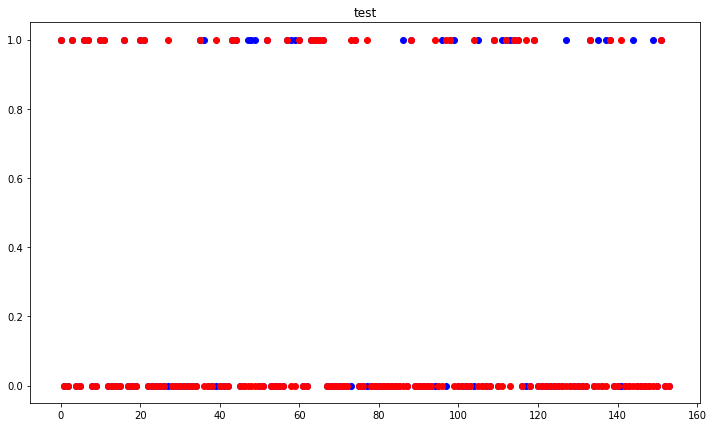

In [54]:
import matplotlib.pyplot as plt
import numpy as np


def plotGraph(y_test,y_pred,regressorName):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.scatter(range(len(y_test)), y_test, color='blue')
    plt.scatter(range(len(y_pred)), y_pred, color='red')
    plt.title(regressorName)
    plt.show()
    return
plotGraph(y_test, y_pred, "test")

In [55]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(X_train, y_train)

LinearRegression()

In [56]:
predect = lin.predict(X_test)

In [57]:
print("Intercept: ", lin.intercept_)
print("Coefficients:")
list(zip(feature, lin.coef_))

Intercept:  -0.9636877828138175
Coefficients:


[('Pregnancies', 0.016291434990411947),
 ('Glucose', 0.006713895839538734),
 ('BloodPressure', -0.002372398149346417),
 ('SkinThickness', -0.000875516921118777),
 ('Insulin', -0.00027172626716783226),
 ('BMI', 0.015784660893269117),
 ('DiabetesPedigreeFunction', 0.12876532678101263),
 ('Age', 0.0028748061822507854)]

In [58]:
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': predect})
mlr_diff

,Actual value,Predicted value
661,1,1.068942
122,0,0.206793
113,0,0.083878
14,1,0.626721
529,0,0.150092
...,...,...
476,1,0.199629
482,0,0.060694
230,1,0.651986
527,0,0.144687
